#### About
1. Since, The fourier transform doesn't tell us when in time the frequencies exist, The transform is thus an ideal for stationary signals.

2. Short time fourier transform was developed to overcome the poor resolution of fourier transform. It yields time-freq representation of the signal. We assume that portion of non stationary signal is stationary in this and thus take Fourier transform for each stationary portion.

3. The wavelet transform results in analysing a singal into different frequencies at different resolutions. It is also know as multiresolution analysis.

4. Continuos wavelet transform is depicted by the following formula. Psi being wavelet function and its complex conjugate is multiplied by the signal f(t)

![CWT_](CWT_.png)

5. A wavelet is our basis function like sin,cosine in fourier transform and acts as a window function. we can change width of wavelet and central frequency by changing s i.e scaling factor. Large s corresponds to lower wavelet frequencies. It helps us to resolve high frequency and low frequency signal components.

6. We use s and T as discrete power of 2, to get discrete wavelet transform which involves less compute. a= T(tau), b=s

![DWT_](DWT.png)

7. DWT is calculated via multilevel decomposition ie. signal is passed into series of low pass and high pass filters.

7. It is often used in signal denoising. Let's analyse an image using wavelet transform using filter banks. The following image shows wavelet reconstruction. The same image when flipped from left to right i.e image to coeefficients turns it into wavelet decomposition. A series of low pass and high pass decomposition filters are used for same.

* The four coeefficient matrices represent wavelet coefficients. The approx. coeeficient include low freq details of image while horizontal, vertical and diagonal include high freq details of image i.e edges.


![FilterBanks](FBT.png)

In [16]:
#pywt's dwt2 method is used for wavelet decomposition at single level while idwt2 is used for reconstruction of signals.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import pywt
import pywt.data

In [17]:
#reading the image and calculating coeefficients
# we'll use daubechies i.e db2
img = cv2.imread('Image.jpg',0)
print(img.shape)

(360, 540)


In [18]:
coeff= pywt.dwt2(img,'db2',mode='periodization')
cA,(cH,cV,cD) = coeff

In [19]:
print(cA.shape, cH.shape,cV.shape,cD.shape)

(180, 270) (180, 270) (180, 270) (180, 270)


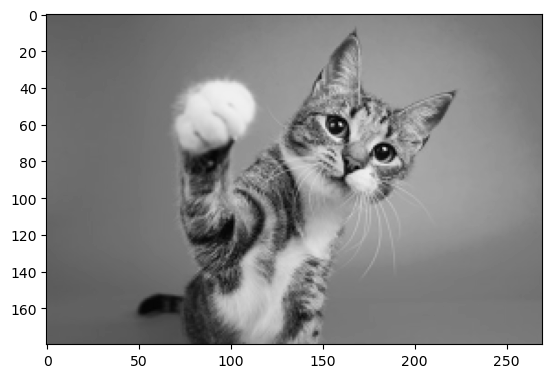

In [20]:
plt.imshow(cA, cmap='gray')

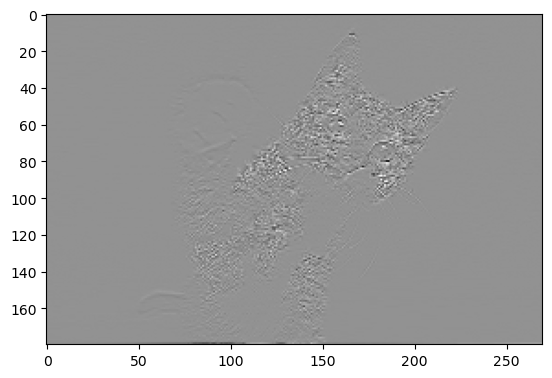

In [21]:
plt.imshow(cH, cmap='gray')

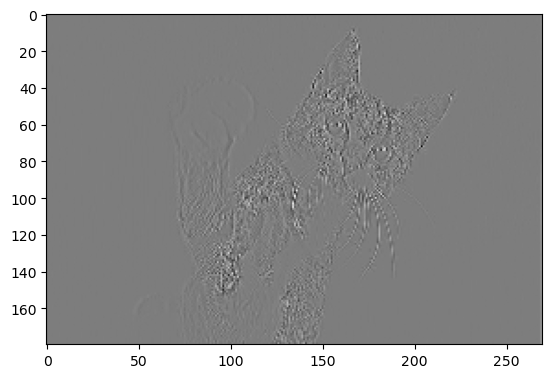

In [22]:
plt.imshow(cV, cmap='gray')

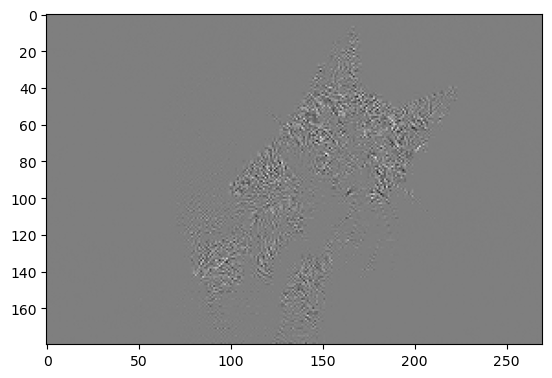

In [23]:
plt.imshow(cD, cmap='gray')

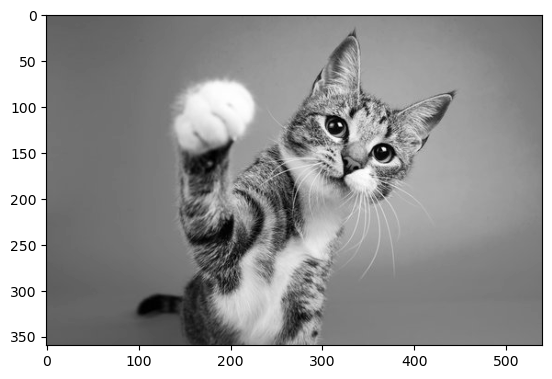

In [24]:
# reconstructing the image using inverse dwt
image_reconstructed = pywt.idwt2(coeff, 'db2', mode='periodization')
plt.imshow(image_reconstructed,cmap='gray')

In [25]:
#multi level wavelet decomposition and reconstrucion using wavedec2() and waverec2()
Coeff_multi = pywt.wavedec2(img,'db6',mode='periodization',level=2)


In [26]:
#reconstructed image
image_recons_multi = pywt.waverec2(Coeff_multi,'db6', mode='periodization')

In [27]:
image_recons_multi = np.uint8(image_recons_multi)

In [29]:
#extracting 2nd level coeff
cA2 = Coeff_multi[0] # m
(cH1,cV1,cD1) = Coeff_multi[-1]
(cH2,cV2,cD2) = Coeff_multi[-2]

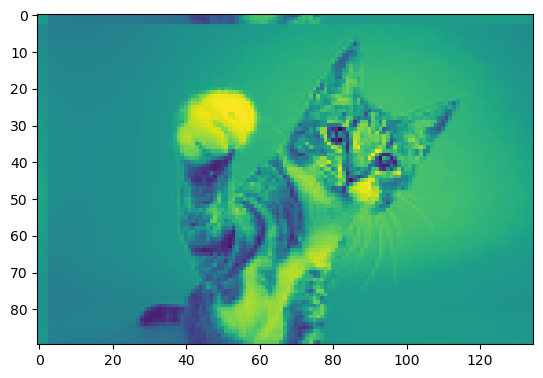

In [30]:
plt.imshow(cA2)

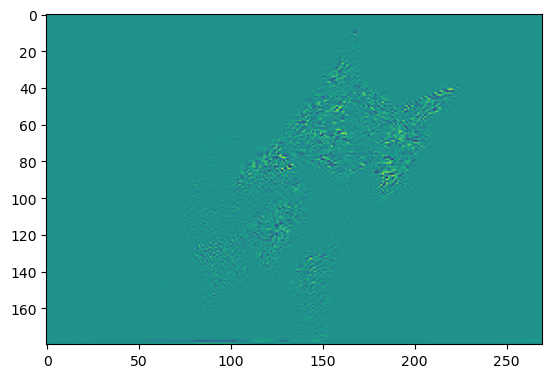

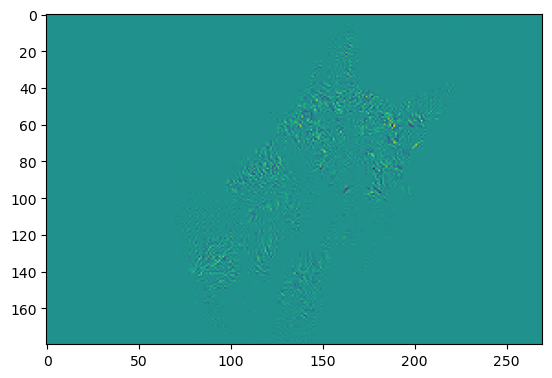

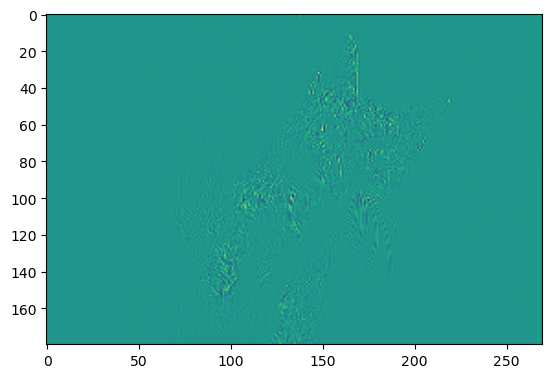

In [31]:
plt.imshow(cH1)
plt.show()
plt.imshow(cD1)
plt.show()
plt.imshow(cV1)
plt.show()


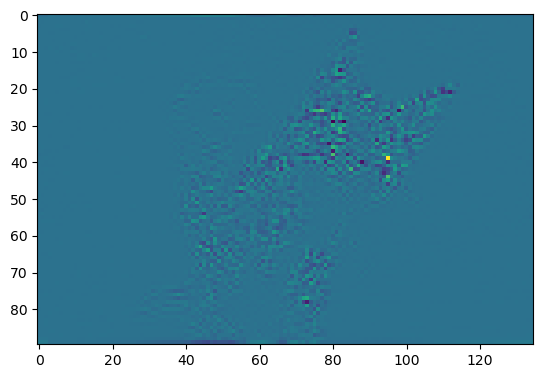

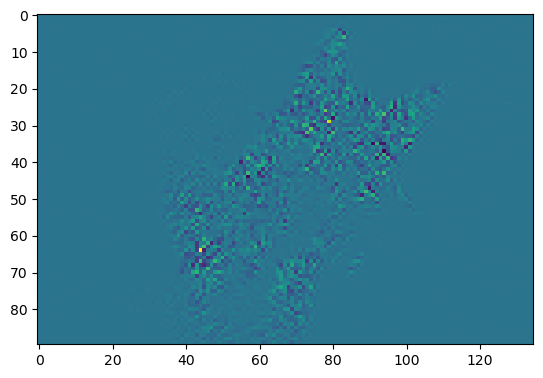

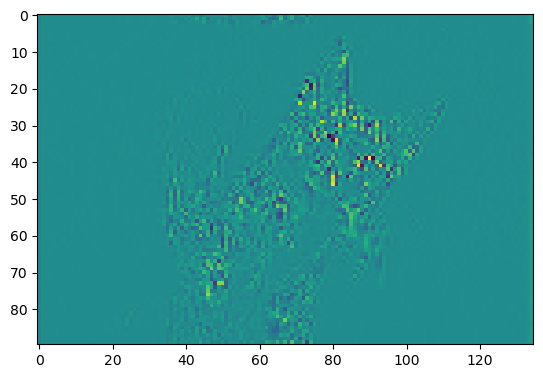

In [32]:
plt.imshow(cH2)
plt.show()
plt.imshow(cD2)
plt.show()
plt.imshow(cV2)
plt.show()


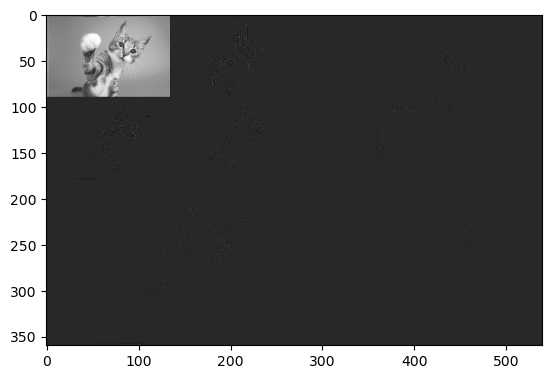

In [36]:
arr,slices = pywt.coeffs_to_array(Coeff_multi)
plt.imshow(arr,cmap='gray')